## Exercise in Photogrammetry I
## **Ex.3 : Histograms and Image Transformations**
### Hand out: xx.xx.xxxx
### Submission: xx.xx.xxxx 
### Points: 17

## A. Histogram Basics *(10 points)*
In this exercise, you will learn how to apply image transformations and how to compute histograms. Whenever you define a **function** write a **docstring** which gives details about the function itself as well as input and output.

For example: 
```
def my_function(arg1, arg2):
    """ Explain what your function does.

    Args:
        arg1: Explain the first argument.
        arg2: Explain the second argument.

    Returns:
        Give details about the return value.
    """
    ...
    return True
```

**Tasks:**
1. import all necessary modules to modify, load and visualize images *(0 points)*
2. Load ```images/cube.jpg``` as a **grayscale** image. Make sure that the pixels are within [0, 255] and the underlying datatype is *uint8*. Finally visualize the image and print out its minimum and maximum value as well as its data type. *(2 points)*
3. Define a **function** ```histogram(image)``` which takes as input an image [np.array] and returns its histogram [np.array]. The histogram should have 256 bins. Do not use built-in python functions which compute the histogram for you! *(3 points)*
4. Define a **function** ```cumulativeHistogram(hist)``` which takes as input a histogram [np.array] and returns the cumulative histogram [np.array]. The histogram should have 256 bins as well. *(3 points)*
5. **Compute** the **histogram** and **cumulative histogram** of the grayscale cube image by calling your previously defined functions. <br>Finally, **plot** the results and assign proper **labels** to both **axis**. *(2 points)*
<br>**Hint:** use ```plt.bar(...)``` for the histogram and ```plt.plot(...)``` for the cumulative histogram.

In [1]:
# 1. Import modules
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [2]:
# 2. Load and visualize image
image = io.imread("/images/cube.jpg", as_gray=True)
image = (image * 255).astype(np.uint8)

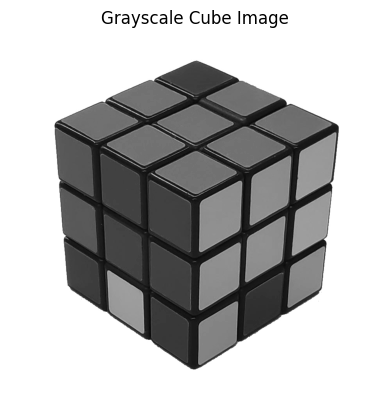

Minimum value: 0
Maximum value: 255
Data type: uint8


In [3]:
# Print out the minimum and maximum value of the displayed image as well as its data type
plt.imshow(image, cmap="gray")
plt.title("Grayscale Cube Image")
plt.axis("off")
plt.show()
print("Minimum value:", np.min(image))
print("Maximum value:", np.max(image))
print("Data type:", image.dtype)

In [5]:
# 3. Define your function called histogram(image) here:
def histogram(image):
    """
    Compute histogram of input grayscale image
    
    Parameters:
    image (np.array): input grayscale image
    
    Returns:
    hist (np.array): computed histogram with 256 bins
    """
    # Initialize histogram with 256 bins
    hist = np.zeros(256, dtype=np.int64)
    
    # Iterate over each pixel in image and update corresponding bin in histogram
    for pixel in image.ravel():
        hist[pixel] += 1
    
    return hist

In [6]:
# 4. Define your function called cumulativeHistogram(hist) here:
def cumulativeHistogram(hist):
    """
    Compute cumulative histogram of input histogram
    
    Parameters:
    hist (np.array): input histogram
    
    Returns:
    cum_hist (np.array): computed cumulative histogram with 256 bins
    """
    # Initialize cumulative histogram with 256 bins
    cum_hist = np.zeros(256, dtype=np.int64)
    
    # Compute cumulative sum of histogram
    cum_sum = np.cumsum(hist)
    
    # Assign cumulative sum to corresponding bin in cumulative histogram
    cum_hist[0] = cum_sum[0]
    for i in range(1, 256):
        cum_hist[i] = cum_sum[i]
    
    return cum_hist

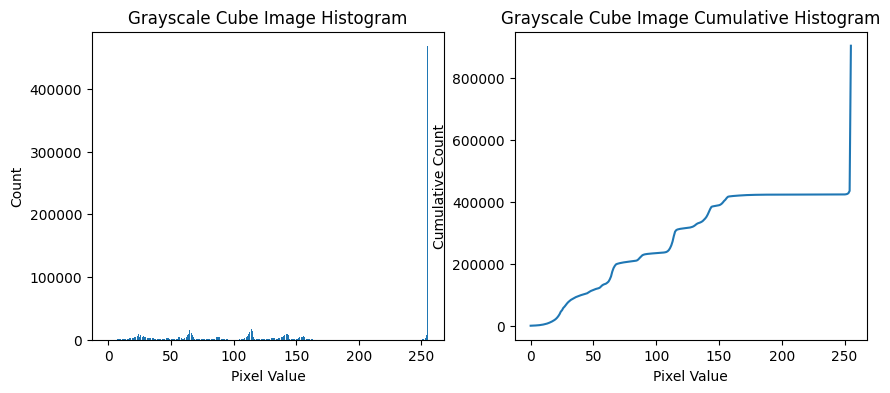

In [8]:
# 5. Compute the histogram and cumulative Histogram
hist = histogram(image)
cum_hist = cumulativeHistogram(hist)
# Plot results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(256), hist)
plt.title("Grayscale Cube Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
plt.plot(range(256), cum_hist)
plt.title("Grayscale Cube Image Cumulative Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Cumulative Count")
plt.show()

## B. Histogram Equalization *(7 points)*
You have learned the concept for **histogram equalization** in the lecture. It transforms the image such that all intensities are used equally often. 

**Tasks:**
1. Define a **function** ```imageEqualization(image)``` which takes an image as input and returns the transformed image after applying the histogram equalization. *(3 points)*
2. **Compute** the **equalized** grayscale **cube image** and **visualize** it next to the original image. Set the title of each image properly. **Explain** your **observations** in the markdown cell below. *(2 points)*
3. **Compute** the **histogram** and **cumulative histogram** of the equalized image. **Plot** both histograms. In the markdown cell below **describe** the **differences** with respect to the original histograms. *(2 points)*

In [9]:
# 1. Define your function called imageEqualization(image) here:
def imageEqualization(image):
    """
    Apply histogram equalization to input image
    
    Parameters:
    image (np.array): input grayscale image
    
    Returns:
    eq_image (np.array): transformed image after histogram equalization
    """
    # Compute histogram and cumulative histogram of input image
    hist = histogram(image)
    cum_hist = cumulativeHistogram(hist)
    
    # Compute normalization factor for histogram equalization
    norm_factor = (image.shape[0] * image.shape[1]) / 256
    
    # Compute lookup table for histogram equalization
    lookup_table = np.floor_divide(cum_hist, norm_factor).astype(np.uint8)
    
    # Apply lookup table to input image
    eq_image = np.zeros_like(image)
    for i in range(256):
        eq_image[image == i] = lookup_table[i]
    
    return eq_image

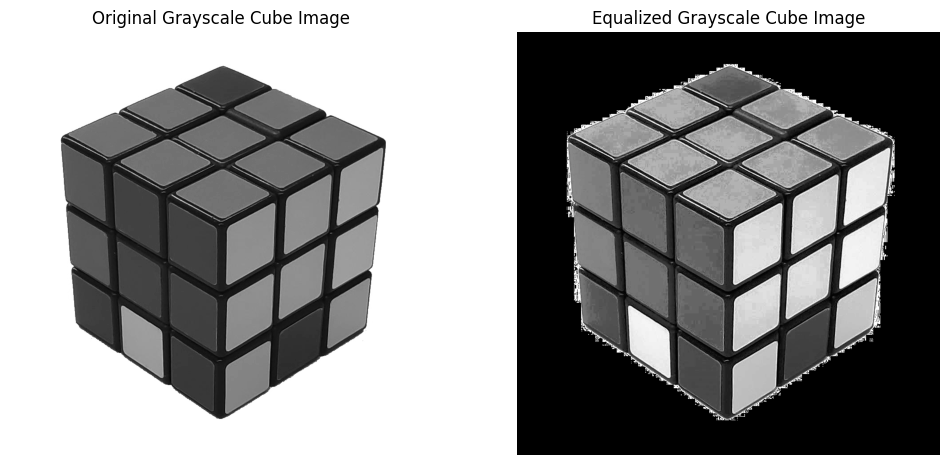

In [10]:
# 2. Compute equalized image
# Apply histogram equalization to grayscale cube image
eq_image = imageEqualization(image)

# Visualize original and equalized images side by side
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Grayscale Cube Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(eq_image, cmap="gray")
plt.title("Equalized Grayscale Cube Image")
plt.axis("off")
plt.show()

**2. Explain your observations here:**

*Your Answer*

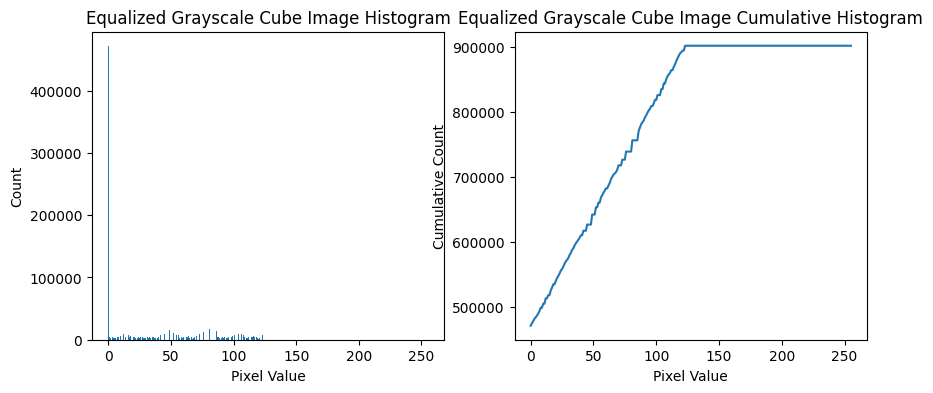

In [11]:
# 3. Compute the histogram and cumulative histogram of the equalized image
eq_hist = histogram(eq_image)
eq_cum_hist = cumulativeHistogram(eq_hist)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(256), eq_hist)
plt.title("Equalized Grayscale Cube Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
plt.plot(range(256), eq_cum_hist)
plt.title("Equalized Grayscale Cube Image Cumulative Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Cumulative Count")
plt.show()

**3. Explain your observations here:**

*The histogram of the equalized image is more uniformly distributed compared to the original histogram.* 